### PCA Analysis on Smart Building Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

from sensor_data_analysis_api import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__
print 'sklearn version:',sk.__version__
pd.set_option("display.max_rows",10)

import warnings
warnings.filterwarnings("ignore")

pandas version:  0.19.2
numpy version: 1.11.3
sklearn version: 0.18.1


### Use Function to load Signals for a particular room 

##### Function Signature
get_signal_dataframe(room, signals = None, mean_type="hour", use_weather_data=True)

signals = None               --   All Signals

mean_type = quarter_hour     --   Aggregated at every 15 minute interval

use_weather_data = false     --   Use and Merge Weather Data

In [ ]:
room = 'Rm-4226'
signals = ["Zone Temperature", 'Supply Airflow']

dataDF = get_signal_dataframe(room, signals = None, mean_type="quarter_hour" , use_weather_data=False)


Read file:  506_0_3001981.csv
Read file:  506_0_3001987.csv
Read file:  506_0_3001985.csv
Read file:  506_0_3001984.csv
Read file:  506_0_3001986.csv
Read file:  506_1_3001989.csv
Read file:  506_1_3015755.csv
Read file:  506_1_3001991.csv
Read file:  506_1_3001988.csv
Read file:  506_1_3001994.csv
Read file:  506_1_3001993.csv
Read file:  506_1_3001996.csv


In [27]:
dataDF.columns

Index([u'time', u'location', u'Actual Cooling Setpoint',
       u'Actual Heating Setpoint', u'Cooling Command', u'Damper Command',
       u'Damper Position', u'Heating Command', u'Maximum Supply Airflow',
       u'Minimum Occupied Cooling Supply Airflow',
       u'Minimum Occupied Heating Supply Airflow', u'Occupancy Command',
       u'Reheat Valve Command', u'Supply Airflow', u'Supply Airflow Setpoint',
       u'Temperature Setpoint', u'Warm Cool Adjust', u'Zone Temperature'],
      dtype='object', name=u'Ground Truth Point Type')

### PCA dimensionality reduction for the signals identified for the room Rm-3126

In [231]:
#rm3126_signals.head(5)

# Check if we  have any NaNs  in the data. Replacing NaNs with 0
#X.isnull().values.any()

df_temp = dataDF

#df_temp.apply(lambda x: x.fillna(x.mean()),axis=0)
#df_temp.fillna(method='pad', inplace = True)

df_temp.fillna(method='ffill', inplace = True)

room_signals = df_temp
X = room_signals.iloc[:,2:]

In [232]:
room_signals.describe()

Ground Truth Point Type,Actual Cooling Setpoint,Actual Heating Setpoint,Cooling Command,Damper Command,Damper Position,Heating Command,Maximum Supply Airflow,Minimum Occupied Cooling Supply Airflow,Minimum Occupied Heating Supply Airflow,Occupancy Command,Reheat Valve Command,Supply Airflow,Supply Airflow Setpoint,Temperature Setpoint,Warm Cool Adjust,Zone Temperature
count,109850.000000,109850.000000,109850.000000,109850.000000,109850.000000,109850.000000,109850.0,109850.0,109850.0,109850.000000,109850.000000,109850.000000,109850.000000,109850.000000,109850.000000,109850.000000
mean,77.041654,64.711933,1.663658,-0.052120,13.379583,1.414792,540.0,165.0,165.0,1.923051,2.317166,81.678205,78.971724,71.785238,0.102847,70.976255
std,3.016073,5.082438,9.330392,0.553939,15.422227,7.589761,0.0,0.0,0.0,0.958986,9.801261,90.044080,94.329523,0.741558,0.475269,3.461290
min,64.350000,54.360000,-0.250000,-33.440000,-18.660000,-0.250000,540.0,165.0,165.0,-1.000000,0.000000,0.000000,-0.250000,62.000000,-0.980000,60.180000
25%,74.360000,60.350000,0.000000,-0.130000,0.000000,0.000000,540.0,165.0,165.0,1.000000,0.000000,4.502500,0.000000,72.000000,0.300000,68.570000
50%,76.350000,60.873333,0.000000,0.000000,0.000000,0.000000,540.0,165.0,165.0,1.267857,0.000000,17.563333,0.000000,72.000000,0.350000,70.630000
75%,80.350000,70.350000,0.000000,0.000000,28.060000,0.000000,540.0,165.0,165.0,3.000000,0.000000,165.777500,165.000000,72.000000,0.350000,73.305000
max,82.360000,76.360000,100.000000,3.150000,105.790000,100.000000,540.0,165.0,165.0,3.000000,100.000000,550.066667,540.000000,78.000000,1.110000,82.920000


In [233]:
from sklearn.decomposition import PCA
X = room_signals.iloc[:,2:].values

pca_signals=PCA()
X_proj = pca_signals.fit_transform(X)

print "Shape of the matrix before PCA"
print X.shape 

print "Shape of the matrix After PCA"
print X_proj.shape 

Shape of the matrix before PCA
(109850, 16)
Shape of the matrix After PCA
(109850, 16)


### With 2 features we are able to explain 88% variance
### With 4 features we are able to explain 95% variance

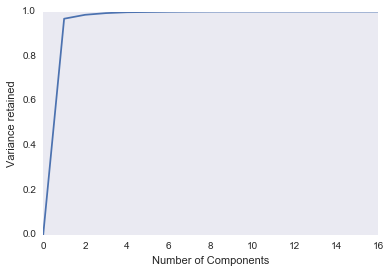

In [234]:
import matplotlib.pyplot as plt
import numpy as np
pca_signals = PCA().fit(X) 
evr = [0]+list(pca_signals.explained_variance_ratio_)
cumulative_explained = np.cumsum(evr) 
plt.plot(cumulative_explained);
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.grid()
plt.show()

### Considering 4 eigen Vectors as we are getting 95% of the data retained.

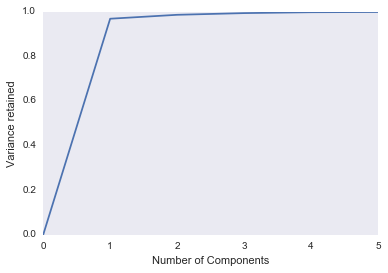




cumulative_explained
[ 0.          0.96788194  0.98543119  0.99301956  0.99697985  0.99803619]


In [243]:
# Perform the PCA with number of compoments (n_comp) = 4
# use fit to calculate eigen vectors.

n_comp = 5

pca_with_n_eigen_vectors_signals = PCA(n_components = n_comp).fit(X) 
evr = [0]+list(pca_with_n_eigen_vectors_signals.explained_variance_ratio_)

cumulative_explained = np.cumsum(evr) 
plt.plot(cumulative_explained);
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.grid()
plt.show()

print "\n\n\ncumulative_explained\n", cumulative_explained


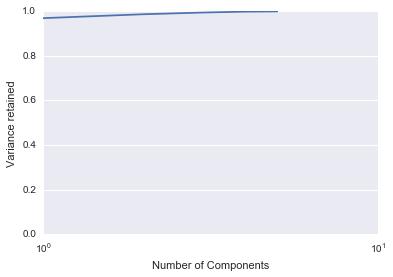

In [244]:
### Transform the current data to new vector space.
signals_data_new_basis = pca_with_n_eigen_vectors_signals.transform(X)   


# Append in the Dataframe. To visualize better.
# Define df_PCA

df_PCA = pd.DataFrame()
df_PCA = df_PCA.append(pd.Series({"original": X, 
                                  "eigen_matrix":pca_with_n_eigen_vectors_signals.components_.shape,
                                  "transformed":signals_data_new_basis.shape}, name=n_comp))


#How much data are we throwing away? 
#plot number of components versus explained variance ratio as a cumulative sum to find out 

plt.semilogx((cumulative_explained)) 
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.show()

### Transform back the data from new space to original space
### Complete data is not recovered because we dropped few components which will throw away he data.

In [245]:
signals_data_orig_basis = pca_with_n_eigen_vectors_signals.inverse_transform(signals_data_new_basis)
signals_data_orig_basis.shape

(109850, 16)

In [246]:
df_new_room_signals = pd.DataFrame(signals_data_orig_basis)
df_result = pd.concat([room_signals.iloc[:,0:2], df_new_room_signals], axis=1)
df_result.columns = list(room_signals.columns)

### PCA Loss Calculation

In [247]:
pca_score = pca_with_n_eigen_vectors_signals.explained_variance_ratio_
pca_score

array([ 0.96788194,  0.01754925,  0.00758837,  0.00396029,  0.00105633])

In [248]:
mse = ((signals_data_orig_basis - X)**2).mean(axis=None)
print "%d-component PCA: MSE = %0.6g"%(n_comp,mse)

5-component PCA: MSE = 2.15201


In [249]:
start_date="2014-12-01"
end_date="2014-12-07"

start = pd.to_datetime(start_date, format='%Y%m%d', infer_datetime_format=True)
end = pd.to_datetime(end_date, format='%Y%m%d', infer_datetime_format=True)

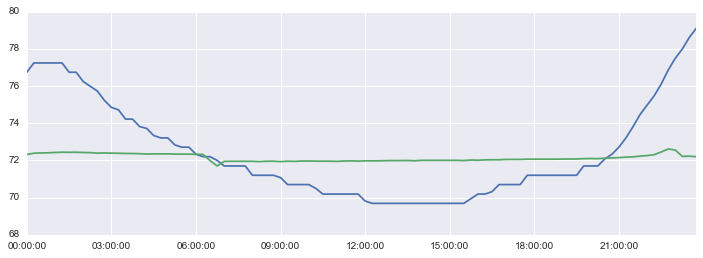

In [250]:
room_signals.time = pd.to_datetime(room_signals.time)
df = room_signals[(room_signals.time.dt.date>=start.date())&(room_signals.time.dt.date<=end.date())]
fig = plt.figure(figsize=(12, 4))
plt.plot(df["time"],df["Zone Temperature"] )

df_result.time = pd.to_datetime(df_result.time)
df2 = df_result[(df_result.time.dt.date>=start.date())&(df_result.time.dt.date<=end.date())]

plt.plot(df2["time"],df2["Zone Temperature"] )

In [ ]:
# room = 'Rm-4226'
# stTime='2014-12-01', enTime='2014-12-07',
# signals = ['Zone Temperature']